# Analysis -  Mouse Gastrulation #
### stage_endo_blood={'E7.0', 'E7.25', 'E7.5', 'E8.25', 'E7.75', 'E8.5', 'E8.0'}
### celltype_endo_blood={'Erythroid2', 'Blood progenitors 2', 'Erythroid3', 'Erythroid1', 'Blood progenitors 1',
###                    'Haematoendothelial progenitors','Blood progenitors 1'}
### Using all 2000 genes to plot cell velocity

In [6]:
from velocity_plot import velocity_plot as vpl
from turtle import color
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sampling import *
import pandas as pd
from colormap import *
import random
import os

In [7]:
# load raw
raw_data_path = "/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/mouse_endo_blood20to25_2000_genes_moment100.csv"
load_raw_data = pd.read_csv(raw_data_path)
load_cellDancer=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/combined_detail/combined_detail.csv')

# define output path
output_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/cell_velocity'
load_cellDancer

cellIndex      gene_name        s0        u0        s1        u1  \
0                 0  2810025M15Rik  1.515440  0.000000  1.514860  0.000022   
1                 1  2810025M15Rik  1.574459  0.000000  1.573860  0.000022   
2                 2  2810025M15Rik  1.744201  0.000000  1.743548  0.000020   
3                 3  2810025M15Rik  1.332406  0.000000  1.331888  0.000024   
4                 4  2810025M15Rik  1.261786  0.000000  1.261292  0.000025   
...             ...            ...       ...       ...       ...       ...   
24657995      12324          Zrsr2  0.255452  0.030816  0.323642  0.022484   
24657996      12325          Zrsr2  0.204272  0.049630  0.322781  0.036203   
24657997      12326          Zrsr2  0.230350  0.050146  0.349145  0.036532   
24657998      12327          Zrsr2  0.236227  0.052799  0.361591  0.038445   
24657999      12328          Zrsr2  0.234467  0.057909  0.372997  0.042155   

             alpha      beta     gamma      cost             clusters  \
0         0.001560  0.022612  0.005908  0.087183  Blood progenitors 2   
1         0.001522  0.022650  0.005876  0.087183  Blood progenitors 2   
2         0.001426  0.022751  0.005787  0.087183  Blood progenitors 2   
3         0.001682  0.022495  0.006009  0.087183  Blood progenitors 2   
4         0.001732  0.022449  0.006049  0.087183  Blood progenitors 2   
...            ...       ...       ...       ...                  ...   
24657995  0.005919  0.101278  0.144163  0.126370           Erythroid3   
24657996  0.008434  0.100651  0.142879  0.126370           Erythroid3   
24657997  0.008174  0.100769  0.143180  0.126370           Erythroid3   
24657998  0.008380  0.100769  0.143180  0.126370           Erythroid3   
24657999  0.008959  0.100709  0.143022  0.126370           Erythroid3   

               cellID  embedding1  embedding2  
0            cell_363    3.460521   15.574629  
1            cell_382    2.490433   14.971734  
2            cell_385    2.351203   15.267069  
3            cell_393    5.899098   14.388825  
4            cell_398    4.823139   15.374831  
...               ...         ...         ...  
24657995  cell_139318    8.032358    7.603037  
24657996  cell_139321   10.352904    6.446736  
24657997  cell_139326    9.464873    7.261099  
24657998  cell_139327    9.990495    7.243880  
24657999  cell_139330    8.260699    7.935455  

[24658000 rows x 14 columns]

cellIndex      gene_name        s0        u0        s1        u1  \
0                 0  2810025M15Rik  1.515440  0.000000  1.514860  0.000022   
12329             0           Abi2  0.168902  0.032592  0.132589  0.028589   
24658             0         Abracl  2.131323  0.011634  2.390506  0.006867   
36987             0          Acbd3  0.259335  0.020050  0.262151  0.018553   
49316             0          Acsl3  0.159017  0.023618  0.169491  0.020518   
...             ...            ...       ...       ...       ...       ...   
24596355          0          Zfhx3  0.061958  0.070506  0.063028  0.063159   
24608684          0         Zfp711  0.135111  0.054888  0.133608  0.050128   
24621013          0          Zfpm1  0.787641  0.119797  0.799073  0.109576   
24633342          0          Znrf1  0.207883  0.092404  0.208824  0.087518   
24645671          0          Zrsr2  0.936427  0.065504  1.065861  0.046539   

             alpha      beta     gamma      cost             clusters  \
0         0.001560  0.022612  0.005908  0.087183  Blood progenitors 2   
12329     0.044718  0.183438  0.206184  0.061460  Blood progenitors 2   
24658     0.003145  0.069484  0.011143  0.082064  Blood progenitors 2   
36987     0.021106  0.022599  0.076732  0.040464  Blood progenitors 2   
49316     0.024260  0.026856  0.064194  0.037499  Blood progenitors 2   
...            ...       ...       ...       ...                  ...   
24596355  0.057886  0.170179  0.277705  0.043691  Blood progenitors 2   
24608684  0.017798  0.082322  0.265513  0.061489  Blood progenitors 2   
24621013  0.049223  0.106107  0.300428  0.060253  Blood progenitors 2   
24633342  0.040349  0.074324  0.272568  0.041974  Blood progenitors 2   
24645671  0.003683  0.103806  0.150585  0.126370  Blood progenitors 2   

            cellID  embedding1  embedding2  index  
0         cell_363    3.460521   15.574629      0  
12329     cell_363    3.460521   15.574629      0  
24658     cell_363    3.460521   15.574629      0  
36987     cell_363    3.460521   15.574629      0  
49316     cell_363    3.460521   15.574629      0  
...            ...         ...         ...    ...  
24596355  cell_363    3.460521   15.574629      0  
24608684  cell_363    3.460521   15.574629      0  
24621013  cell_363    3.460521   15.574629      0  
24633342  cell_363    3.460521   15.574629      0  
24645671  cell_363    3.460521   15.574629      0  

[2000 rows x 15 columns]

In [34]:
gene_samples=["Blvrb",
"Phc2",
"Skap1",
"Nfkb1",
"Myo1b",
"Sulf2",
"Yipf5",
"Coro2b",
"Mllt3",
"Smarca2",
"Hba-x",
"Smim1",
"Snca"]

for gene in gene_samples:
    onegene=load_cellDancer[load_cellDancer.gene_name==gene]
    print(gene)
    print(np.corrcoef(onegene.s0, onegene.u0)[0,1])

Blvrb
0.9248000222539683
Phc2
0.7109766471633524
Skap1
0.5972154178848966
Nfkb1
0.8664380930021173
Myo1b
0.9145030447088645
Sulf2
0.8468387459656942
Yipf5
0.7169371845803519
Coro2b
0.8623804551239886
Mllt3
0.870144308434478
Smarca2
0.87445147532409
Hba-x
0.9556834989273062
Smim1
0.9233511503654244
Snca
0.9034384988822081


2810025M15Rik
0.12983576338769062
Abi2
0.549284383663203
Abracl
0.3716636201581189
Acbd3
0.37653017351196333
Acsl3
0.17804077483329403
Actr3
0.5332540524532764
Adarb1
0.46490919672955433
Adss
0.09655025051319806
Aff3
0.7970852156054138
Ahi1
0.26606404134880046


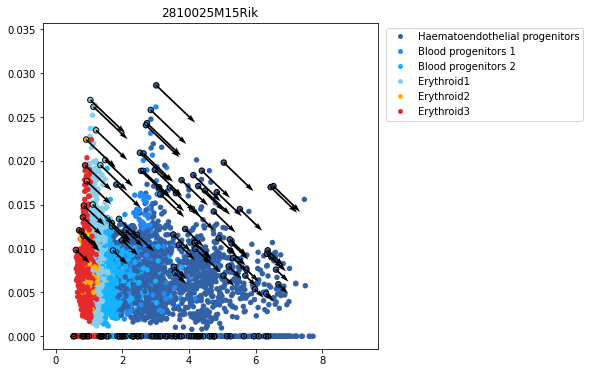

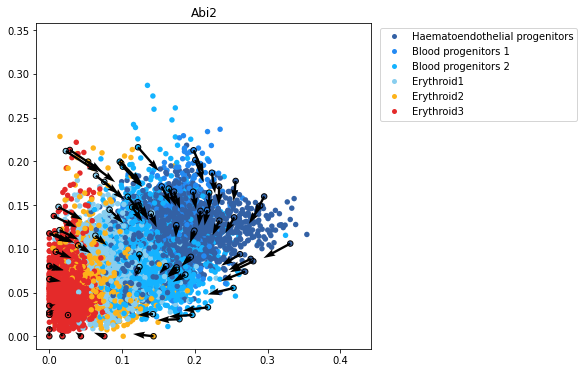

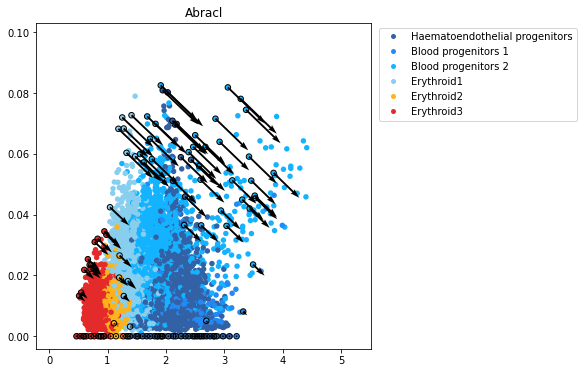

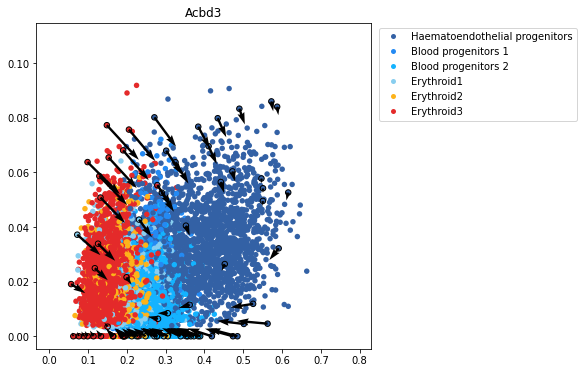

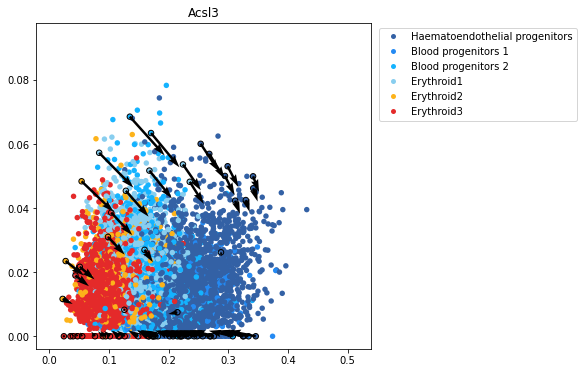

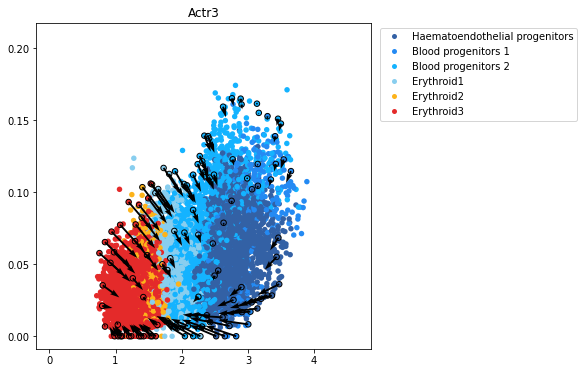

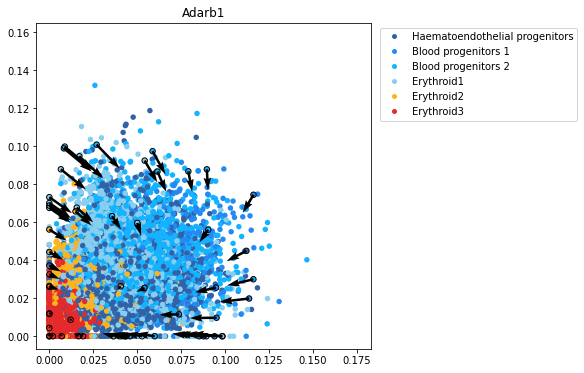

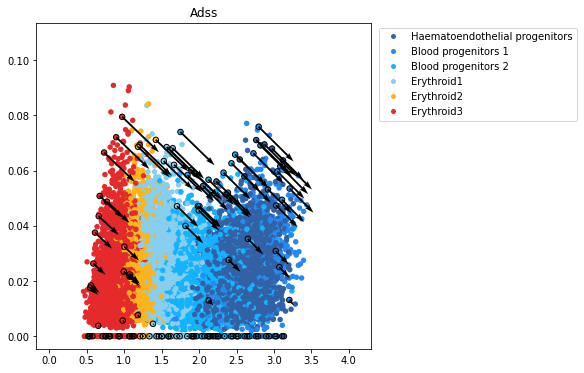

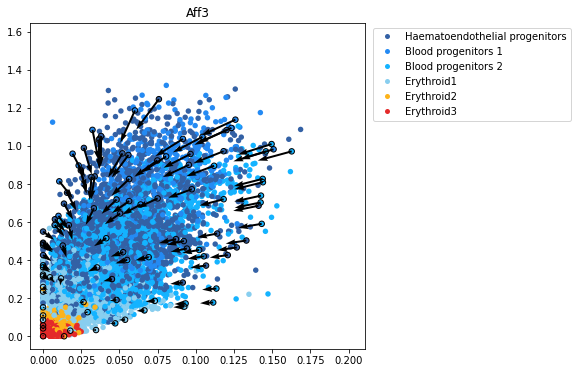

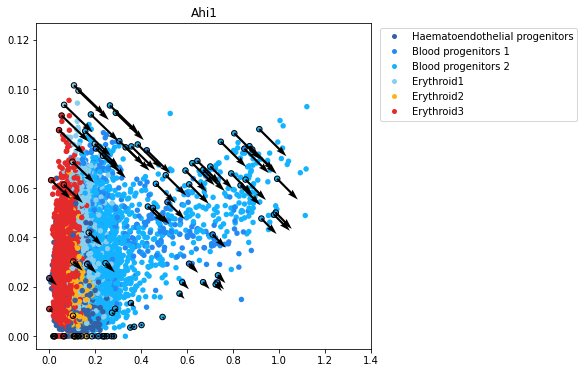

In [37]:
gene_samples=cost_table.gene_name[0:50]

for gene in load_cellDancer.gene_name.drop_duplicates()[0:10]:
    onegene=load_cellDancer[load_cellDancer.gene_name==gene]
    print(gene)
    print(np.corrcoef(onegene.s0, onegene.u0)[0,1])
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1)

In [42]:
np.corrcoef([1,100,2,200,3,400,1,100,2,200,3,400], [100,1,200,2,300,4,100,1,200,2,300,4])[0,1]


-0.679943567555751

------n_neighbors10
------add_amt_gene2000
neighbors
tranfer mode: power10
using gene mode
(2000, 12329)
(2000, 12329)


/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/get_embedding.py:50: RuntimeWarning: invalid value encountered in true_divide
  np.sqrt(np.dot(ematrix_ss[:, None], vmatrix_ss[None]))


4.1930088182233645
0.6906665710493576
0.16471860685043885


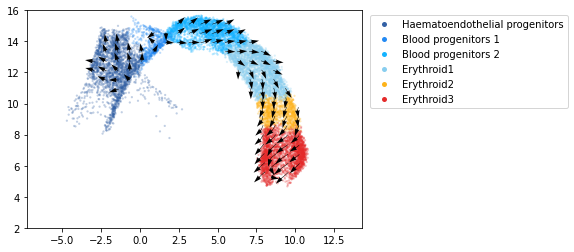

In [9]:
vpl.velocity_cell_map_curve(load_raw_data,load_cellDancer,n_neighbors=10,add_amt_gene=2000, save_path=output_path, save_csv=True, gene_list=None, colors=colormap_erythroid,step=(100,100),mode='gene',pca_n_components=None,file_name_additional_info=file_name_additional_info,umap_n=umap_n,transfer_mode='power10',umap_n_components=umap_n_components,min_mass=15,grid_steps=(20, 20),custom_xlim=[-6,13],custom_ylim=[2,16],alpha_inside=0.3,use_downsampling= True)

array([[<AxesSubplot:title={'center':'cost'}>]], dtype=object)

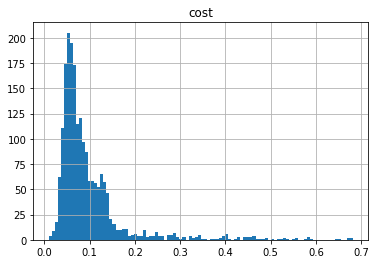

In [21]:
cost_table.hist('cost',bins=100)

In [28]:
cost_table=load_cellDancer[load_cellDancer.cellIndex==0]
testlist=list(cost_table.sort_values('cost').gene_name)

/Users/wanglab/Documents/ShengyuLi/Velocity/bin/cellDancer-development_20220128/src/velocity_plot.py:759: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(None,(6,6))


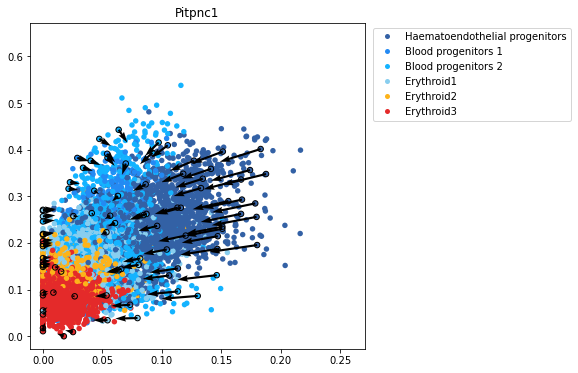

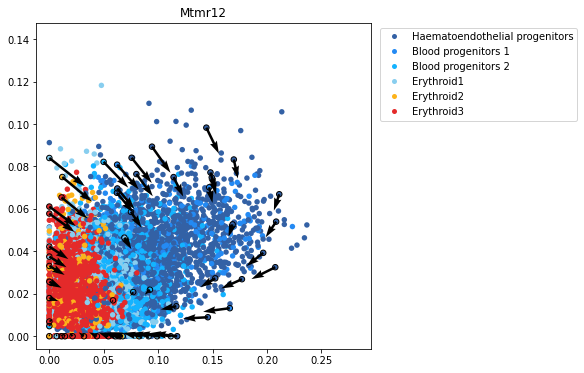

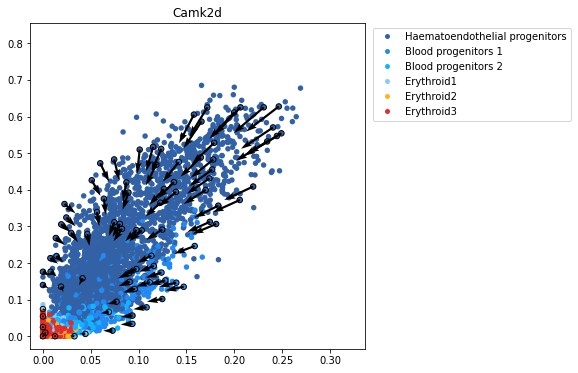

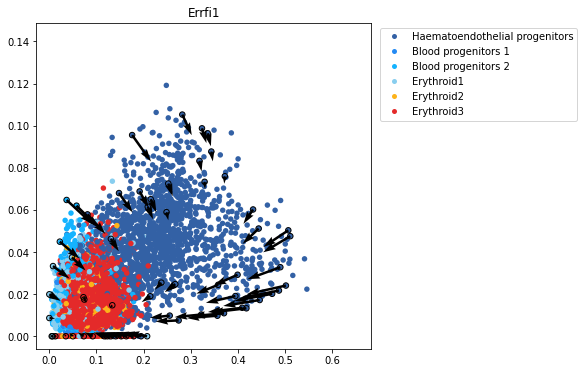

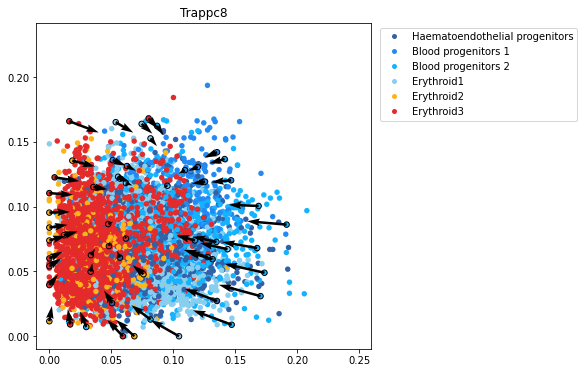

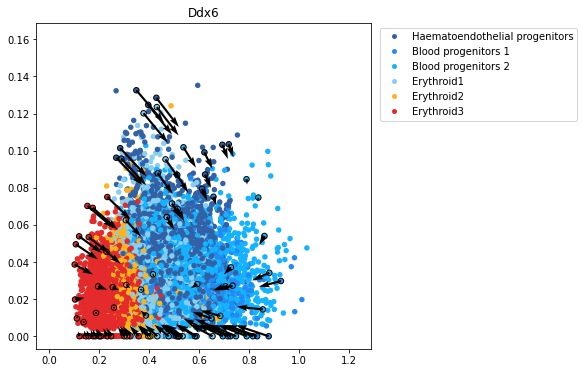

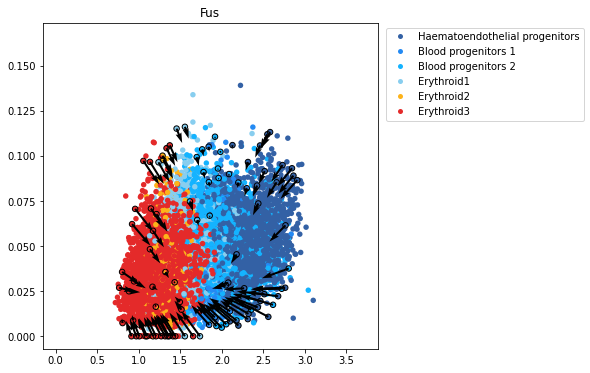

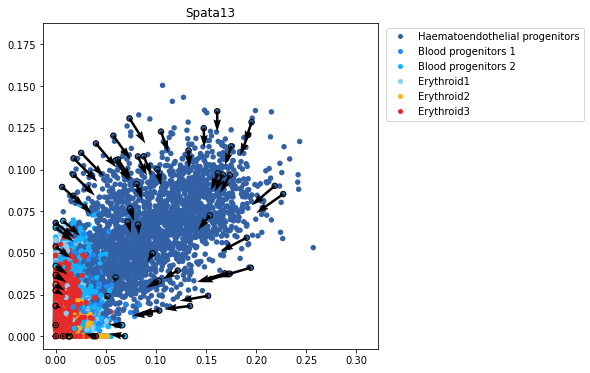

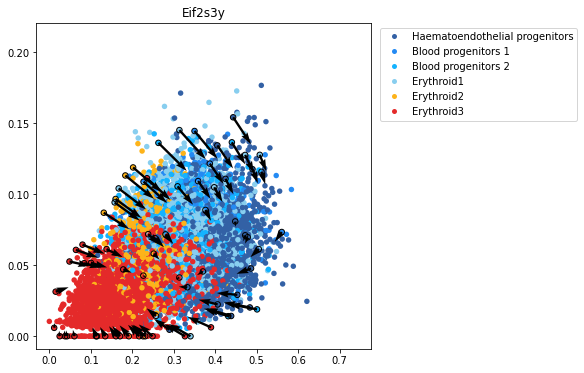

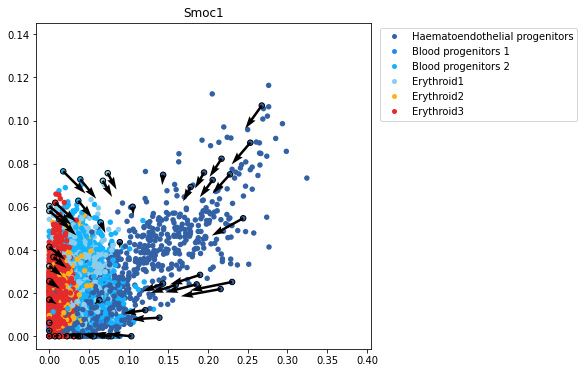

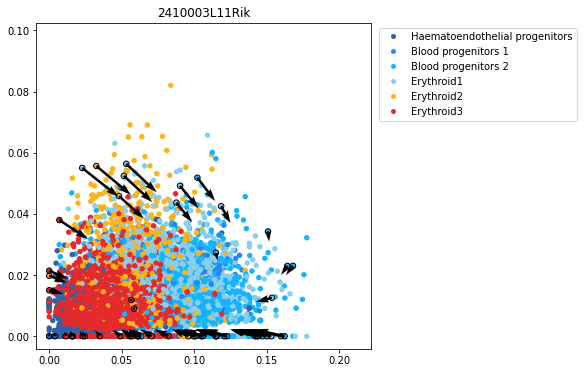

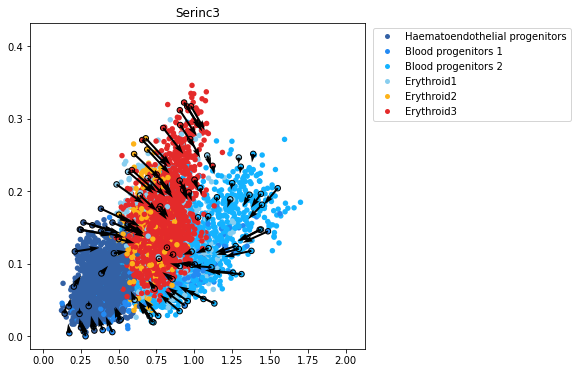

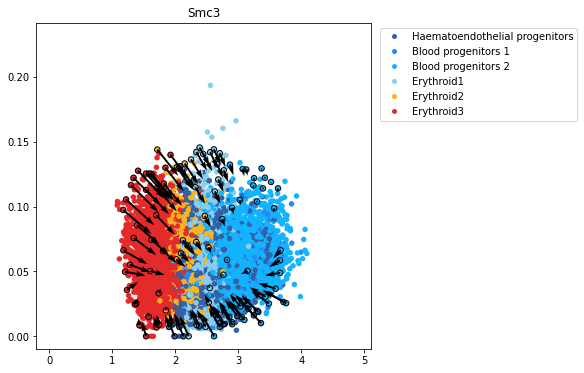

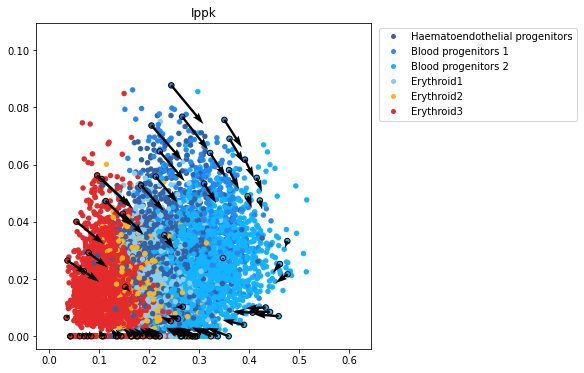

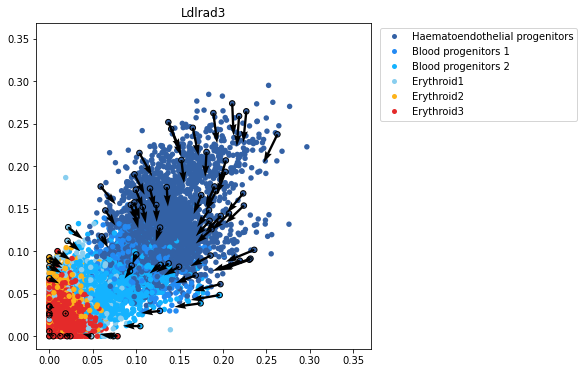

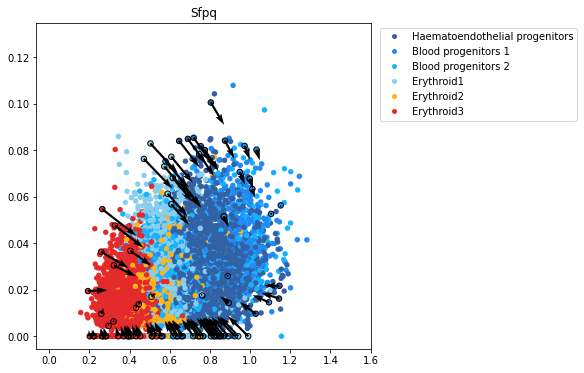

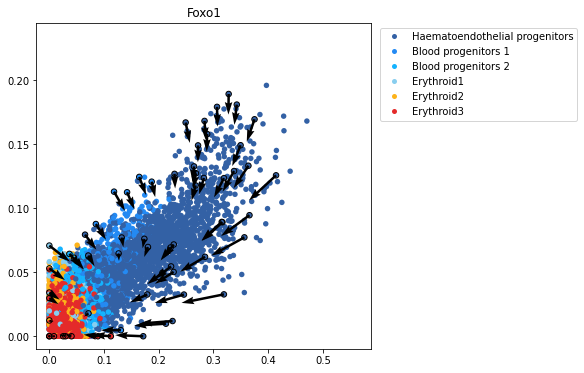

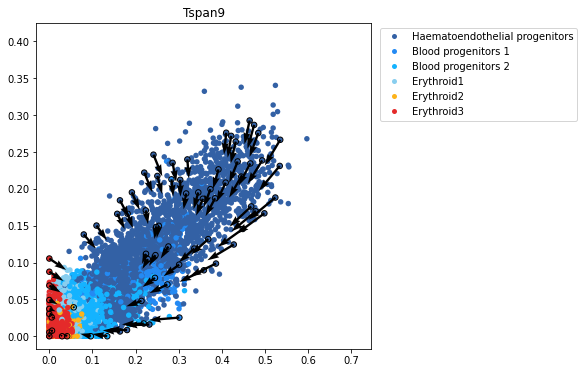

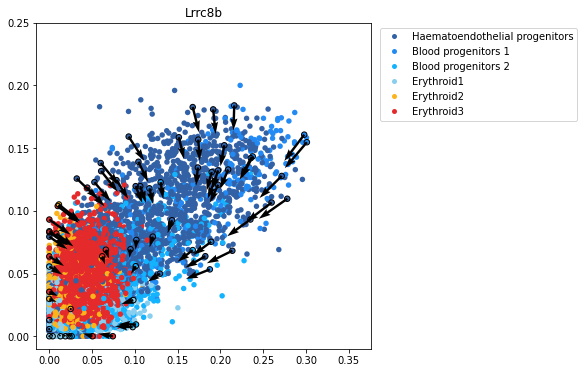

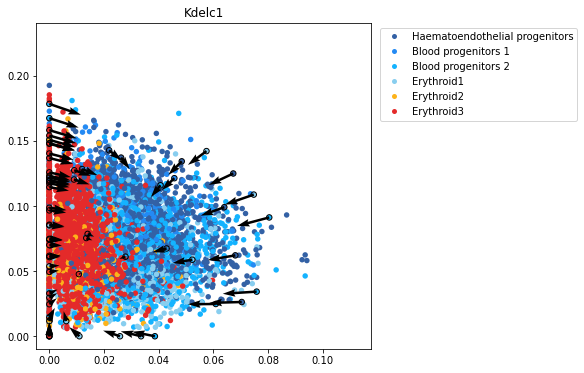

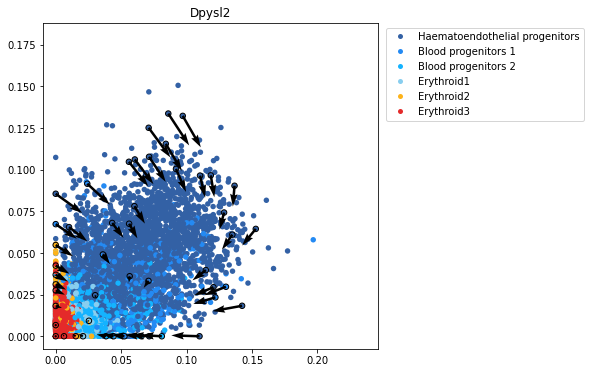

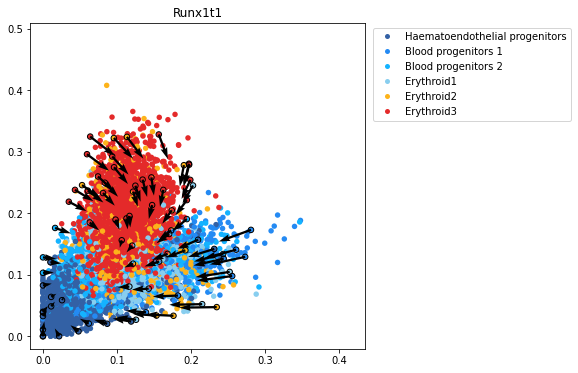

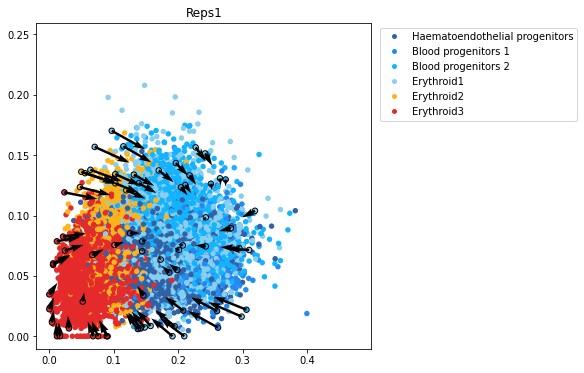

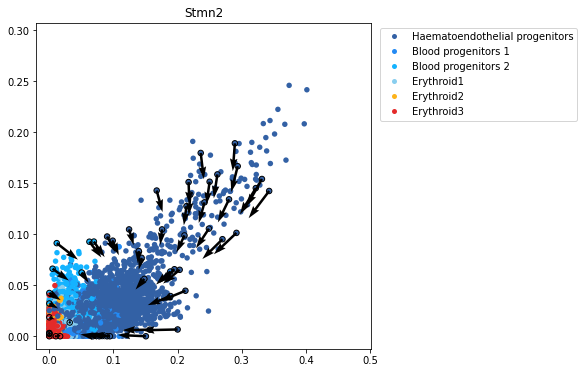

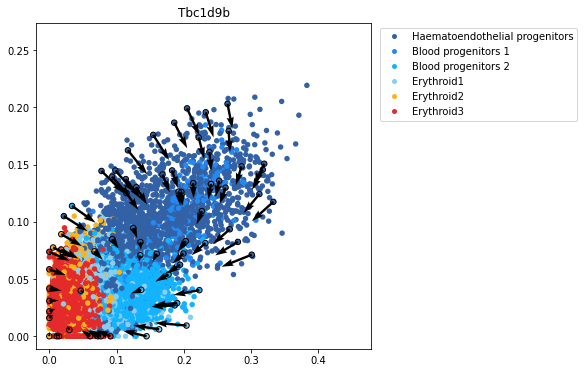

In [30]:
# gene velocity plot
color_list=solarExtra02.copy()

colors = {
'Haematoendothelial progenitors':color_list[0],
'Blood progenitors 1':color_list[1],
'Blood progenitors 2':color_list[2],
'Erythroid1':color_list[3],
'Erythroid2':color_list[4],
'Erythroid3':color_list[5]}

four_samples=['Smim1','Hba-x','Myo1b','Coro2b']
four_samples=["Blvrb",
"Phc2",
"Skap1",
"Nfkb1",
"Myo1b",
"Sulf2",
"Yipf5",
"Coro2b",
"Mllt3",
"Smarca2",
"Hba-x",
"Smim1",
"Snca"]

four_samples=testlist[50:75]

one_gene_raw=load_raw_data[load_raw_data.gene_list==load_raw_data.gene_list.iloc[0]]
cluster_info=one_gene_raw['clusters']
save_dir='/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes_v2_smooth_bin/2000genes_with_bin_and_smooth/gene_velocity/'
for gene in four_samples:
    #vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1,save_path=save_dir+gene+'.pdf')
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1)

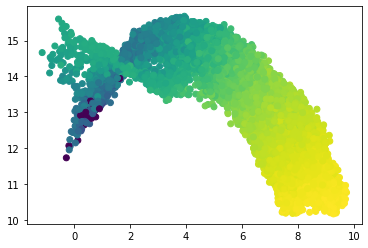

In [6]:
# Hba-x s0 in three clusters
load_raw_data_hba=load_raw_data[load_raw_data.gene_list.isin(['Hba-x'])].reset_index()
load_cellDancer_hba=load_cellDancer[load_cellDancer.gene_name.isin(['Hba-x'])].reset_index()
cell_keep=['Blood progenitors 2','Blood progenitors 1','Erythroid1']
load_raw_data_hba=load_raw_data_hba[load_raw_data_hba.clusters.isin(cell_keep)]
plt.scatter(load_raw_data_hba.embedding1, load_raw_data_hba.embedding2,c=np.log((load_raw_data_hba.s0+0.0001).to_numpy()))
# plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000_genes/cell_level_s0/Hba-x_s0_21BP1_22BP2_23ERY1.pdf')

In [14]:
gene_list=load_cellDancer.gene_name.drop_duplicates()
for i,gene in enumerate(gene_list[2000:2001]):
    print(str(i)+gene)
    vpl.velocity_gene(gene,load_cellDancer,colors=colors,mode='cluster',cluster_annot=True,cluster_info=cluster_info,point_size=30,alpha_inside=1,save_path=save_dir+gene+'.pdf')